In [80]:
import numpy as np 
import pandas as pd 

In [81]:
data = pd.read_csv('/content/population_growth.csv') 
data.head()

,Unnamed: 0,Index,District,State,Population,Growth,Sex-Ratio,Literacy
0,0,1,Thane,Maharashtra,"11,060,148",36.01 %,886,84.53
1,1,2,North Twenty Four Parganas,West Bengal,"10,009,781",12.04 %,955,84.06
2,2,3,Bangalore,Karnataka,"9,621,551",47.18 %,916,87.67
3,3,4,Pune,Maharashtra,"9,429,408",30.37 %,915,86.15
4,4,5,Mumbai Suburban,Maharashtra,"9,356,962",8.29 %,860,89.91


In [82]:
del data['Unnamed: 0']

In [83]:
data.head()

,Index,District,State,Population,Growth,Sex-Ratio,Literacy
0,1,Thane,Maharashtra,"11,060,148",36.01 %,886,84.53
1,2,North Twenty Four Parganas,West Bengal,"10,009,781",12.04 %,955,84.06
2,3,Bangalore,Karnataka,"9,621,551",47.18 %,916,87.67
3,4,Pune,Maharashtra,"9,429,408",30.37 %,915,86.15
4,5,Mumbai Suburban,Maharashtra,"9,356,962",8.29 %,860,89.91


In [84]:
del data['Index']

In [85]:
data.head()

,District,State,Population,Growth,Sex-Ratio,Literacy
0,Thane,Maharashtra,"11,060,148",36.01 %,886,84.53
1,North Twenty Four Parganas,West Bengal,"10,009,781",12.04 %,955,84.06
2,Bangalore,Karnataka,"9,621,551",47.18 %,916,87.67
3,Pune,Maharashtra,"9,429,408",30.37 %,915,86.15
4,Mumbai Suburban,Maharashtra,"9,356,962",8.29 %,860,89.91


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   District    640 non-null    object 
 1   State       640 non-null    object 
 2   Population  640 non-null    object 
 3   Growth      640 non-null    object 
 4   Sex-Ratio   640 non-null    int64  
 5   Literacy    640 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 30.1+ KB


In [87]:
def preplacer(i):
  return int(i.replace(',','')) 
data['Population'] = data["Population"].apply(preplacer)
# data.head()

In [88]:
# for i in data['Growth']:
  # i.replace(' %', '') 
def replacer(i):
  return i.replace(' %','')
data["Growth"] = data["Growth"].apply(replacer)
data.head()

,District,State,Population,Growth,Sex-Ratio,Literacy
0,Thane,Maharashtra,11060148,36.01,886,84.53
1,North Twenty Four Parganas,West Bengal,10009781,12.04,955,84.06
2,Bangalore,Karnataka,9621551,47.18,916,87.67
3,Pune,Maharashtra,9429408,30.37,915,86.15
4,Mumbai Suburban,Maharashtra,9356962,8.29,860,89.91


In [89]:
data['Growth'] = data['Growth'].astype('float32')

In [90]:
data.dtypes

District       object
State          object
Population      int64
Growth        float32
Sex-Ratio       int64
Literacy      float64
dtype: object

In [91]:
data.sort_values(by=['Growth'], ascending=False, inplace=True)

In [92]:
data  = data[data["Population"]>1000000]

In [94]:
data

,District,State,Population,Growth,Sex-Ratio,Literacy
327,Gurgaon,Haryana,1514432,73.959999,854,84.70
16,Rangareddy,Andhra Pradesh,5296741,48.160000,961,75.87
2,Bangalore,Karnataka,9621551,47.180000,916,87.67
88,Bahraich,Uttar Pradesh,3487731,46.480000,892,49.36
26,Ghaziabad,Uttar Pradesh,4681645,42.270000,881,78.07
...,...,...,...,...,...,...
415,Idukki,Kerala,1108974,-1.790000,1006,91.99
397,Pathanamthitta,Kerala,1197412,-2.970000,1132,96.55
310,Ratnagiri,Maharashtra,1615069,-4.820000,1122,82.18
413,Shrawasti,Uttar Pradesh,1117361,-5.020000,881,46.74


# **Top 10 Cities**

In [95]:
top_10 = data.iloc[:10] 
top_10

,District,State,Population,Growth,Sex-Ratio,Literacy
327,Gurgaon,Haryana,1514432,73.959999,854,84.70
16,Rangareddy,Andhra Pradesh,5296741,48.160000,961,75.87
2,Bangalore,Karnataka,9621551,47.180000,916,87.67
88,Bahraich,Uttar Pradesh,3487731,46.480000,892,49.36
26,Ghaziabad,Uttar Pradesh,4681645,42.270000,881,78.07
11,Surat,Gujarat,6081322,42.240002,787,85.53
190,Bikaner,Rajasthan,2363937,41.189999,905,65.13
56,Kancheepuram,Tamil Nadu,3998252,38.950001,986,84.49
421,Anantnag,Jammu and Kashmir,1078692,38.580002,927,62.69
419,Mewat,Haryana,1089263,37.930000,907,54.08


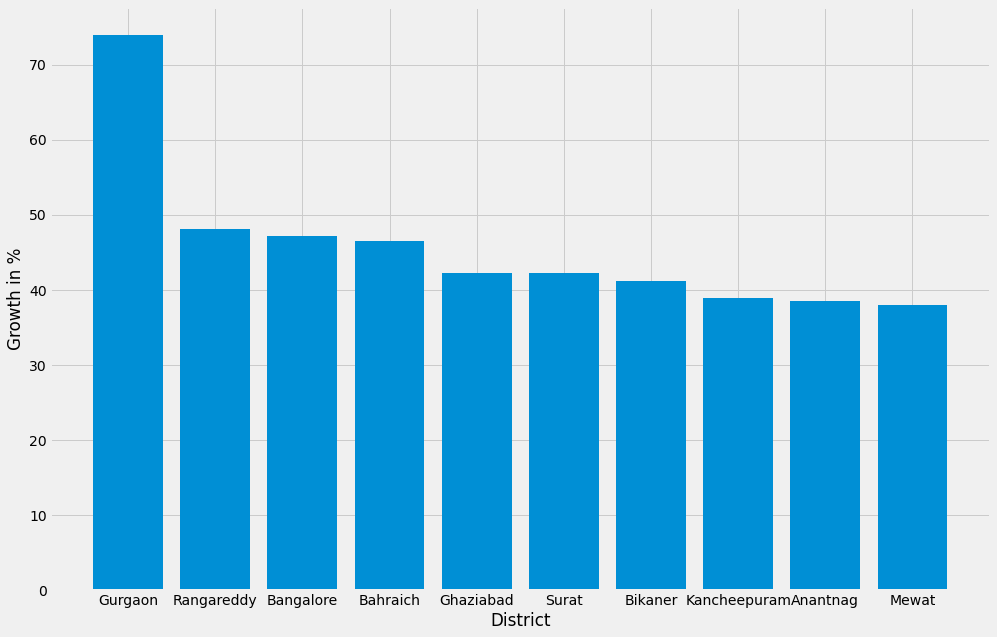

In [107]:
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.bar(top_10['District'], top_10['Growth'])
plt.ylabel('Growth in %') 
plt.xlabel('District') 
plt.show()

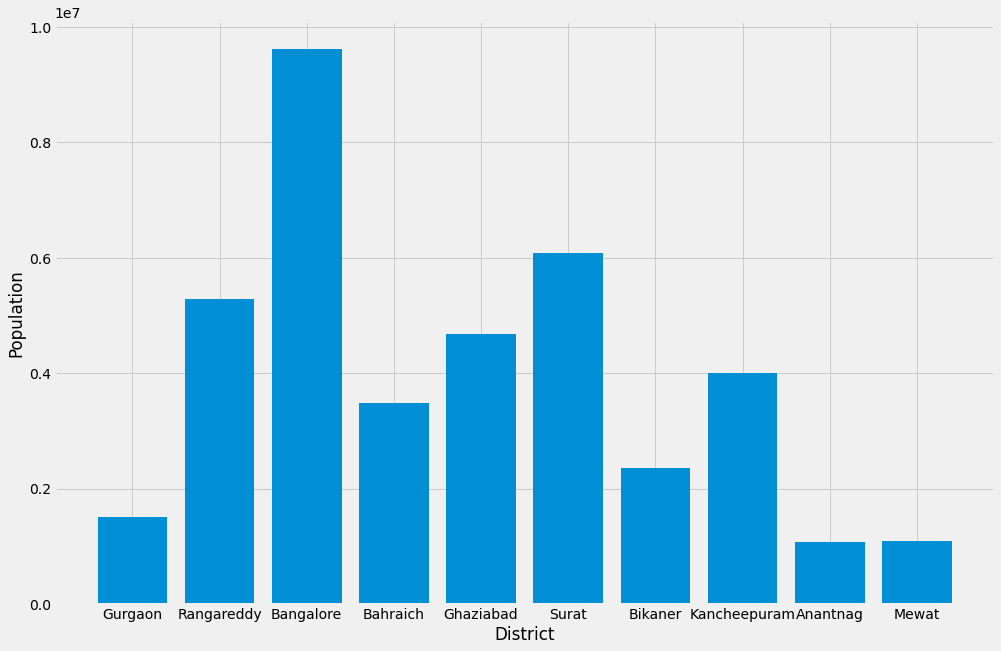

In [108]:
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.bar(top_10['District'], top_10['Population'])
plt.ylabel('Population') 
plt.xlabel('District')
plt.show()

# **States**

In [114]:
state_data = data.groupby('State').sum()
top10_states = state_data['Population'].sort_values(ascending=False)

In [115]:
top10_states

State
Uttar Pradesh        197944653
Maharashtra          111524682
Bihar                102106021
West Bengal           91276115
Andhra Pradesh        84580777
Tamil Nadu            70091519
Rajasthan             67010670
Madhya Pradesh        65325226
Karnataka             59549855
Gujarat               58228633
Orissa                35565647
Kerala                32588641
Jharkhand             27310737
Assam                 22142319
Chhattisgarh          20734676
Punjab                20156014
Haryana               20102678
Delhi                 15175639
Uttarakhand            5236018
Jammu and Kashmir      4853518
Tripura                1725739
Himachal Pradesh       1510075
Chandigarh             1055450
Name: Population, dtype: int64

In [121]:
up_data = data[data['State']=='Uttar Pradesh']
up_data

,District,State,Population,Growth,Sex-Ratio,Literacy
88,Bahraich,Uttar Pradesh,3487731,46.480000,892,49.36
26,Ghaziabad,Uttar Pradesh,4681645,42.270000,881,78.07
303,Gautam Buddha Nagar,Uttar Pradesh,1648115,37.110001,851,80.12
212,Balrampur,Uttar Pradesh,2148665,27.719999,928,49.51
254,Sonbhadra,Uttar Pradesh,1862559,27.270000,918,64.03
...,...,...,...,...,...,...
270,Etah,Uttar Pradesh,1774480,13.620000,873,70.81
375,Baghpat,Uttar Pradesh,1303048,11.950000,861,72.01
31,Kanpur Nagar,Uttar Pradesh,4581268,9.920000,862,79.65
416,Hamirpur,Uttar Pradesh,1104285,5.800000,861,68.77


In [122]:
up_data.sort_values(by=['Growth'], ascending=False, inplace=True) 
up_data.head()

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,District,State,Population,Growth,Sex-Ratio,Literacy
88,Bahraich,Uttar Pradesh,3487731,46.480000,892,49.36
26,Ghaziabad,Uttar Pradesh,4681645,42.270000,881,78.07
303,Gautam Buddha Nagar,Uttar Pradesh,1648115,37.110001,851,80.12
212,Balrampur,Uttar Pradesh,2148665,27.719999,928,49.51
254,Sonbhadra,Uttar Pradesh,1862559,27.270000,918,64.03


In [123]:
top10_up = up_data.iloc[:10]

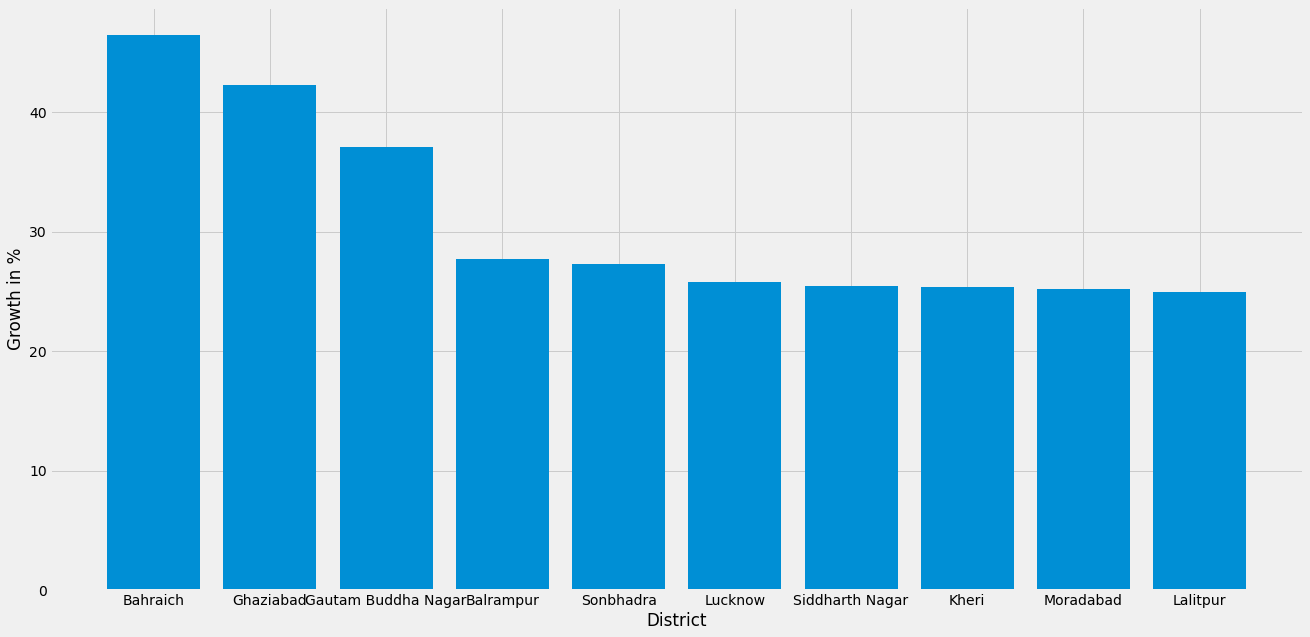

In [130]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20, 10))
plt.style.use('fivethirtyeight')
plt.bar(top10_up['District'], top10_up['Growth'])
plt.yticks()
plt.ylabel('Growth in %') 
plt.xlabel('District') 
plt.show()